In [1]:
import pandas as pd

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import seaborn as sns

In [3]:
train = pd.read_csv(r'C:/Users/User/Desktop/UTeM/Data Science/Project/news.csv')
train.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
train_dict = {'Title':train['title'],
          'Text':train["text"],
          'Label':train['label']}
train_df = pd.DataFrame(train_dict)

In [12]:
train_df.count()

Title    6335
Text     6335
Label    6335
dtype: int64

In [15]:
fake_set = train_df.loc[train_df['Label'] == 'FAKE']
real_set = train_df.loc[train_df['Label'] == 'REAL']
print(fake_set.count())
print(real_set.count())

Title    3164
Text     3164
Label    3164
dtype: int64
Title    3171
Text     3171
Label    3171
dtype: int64


In [16]:
real_train_data = pd.concat([fake_set,real_set])

In [17]:
real_train_data = shuffle(real_train_data)

In [18]:
real_train_data.columns

Index(['Title', 'Text', 'Label'], dtype='object')

In [27]:
test = pd.read_excel(r'C:/Users/User/Desktop/UTeM/Data Science/Project/Test_data.xlsx')
test.head()

,title,text,subject,label
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,FAKE
2,BARBRA STREISAND Gives Up On Dream Of Impeachi...,Barbra Streisand was an Obama sycophant and on...,left-news,FAKE
3,WATCH: SENATOR LINDSEY GRAHAM DROPS BOMBSHELL ...,Everyone suspected the sketchy Steele Dossier ...,left-news,FAKE
4,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,FAKE


In [29]:
test_dict = {'Title':test['title'],
          'Text':test['text'],
          'Label':test['label']}
test_df = pd.DataFrame(test_dict)

In [32]:
test_fake_set = test_df.loc[test_df['Label'] == 'FAKE']
test_real_set = test_df.loc[test_df['Label'] == 'REAL']
print(test_fake_set.count())
print(test_real_set.count())

Title    104
Text     104
Label    104
dtype: int64
Title    174
Text     174
Label    174
dtype: int64


In [33]:
## concatinating true and false labeled datasets
real_test_data = pd.concat([test_fake_set,test_real_set])
## shuffling real_train_data
real_test_data = shuffle(real_test_data)

In [42]:
## CountVectorizer tokenizes the collection of text documents and build a vocabulary of known words it returns ints 
count_vectorizer = CountVectorizer(stop_words = 'english')

## function of fit_transform is fit and transform the function for feature extraction 
count_train = count_vectorizer.fit_transform(real_train_data['Title'])

## transforms documents to document-type matrix
count_test = count_vectorizer.transform(real_test_data['Title'])

In [43]:
## TfidVectorizer is same as CountVectorizer but it returns float  values. In the below I'd compare the both values it false 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

## function of fit_transform is fit and transform the function for feature extraction 
tfidf_train = tfidf_vectorizer.fit_transform(train_df['Title'])

## transforms documents to document-type matrix
tfidf_test = tfidf_vectorizer.transform(test_df['Title'])

In [44]:
print(tfidf_vectorizer.get_feature_names()[:10])
print(tfidf_train.A[:5])

['00', '000', '00pm', '01', '04', '05', '06', '08', '10', '100']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [47]:
tfidf_train.shape

(6335, 9820)

In [50]:
## Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

## Fit the classifier to the training data
nb_classifier.fit(count_train, real_train_data['Label'])

## Create the predicted tags: pred
mnb_pred = nb_classifier.predict(count_test)

## Create the predicted tags: pred
mnb_score = metrics.accuracy_score(real_test_data['Label'], mnb_pred)

## Calculate the confusion matrix: mnb_cm
mnb_cm = metrics.confusion_matrix(real_test_data['Label'], mnb_pred, labels=['REAL', 'FAKE'])
print('Confusion Matrix')
print(mnb_cm)
print("Multinomial Naive Bayes accuracy:   %0.3f" % mnb_score)

Confusion Matrix
[[148  26]
 [ 32  72]]
Multinomial Naive Bayes accuracy:   0.791


              precision    recall  f1-score   support

        FAKE       0.73      0.69      0.71       104
        REAL       0.82      0.85      0.84       174

    accuracy                           0.79       278
   macro avg       0.78      0.77      0.77       278
weighted avg       0.79      0.79      0.79       278



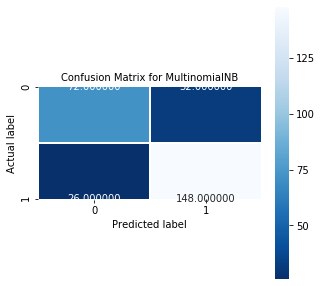

In [52]:
mnb_cm = metrics.confusion_matrix(real_test_data['Label'],mnb_pred)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(mnb_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix for MultinomialNB', size = 10);

report = classification_report(real_test_data['Label'],mnb_pred)
print(report)

In [54]:
## Naive Bayes Classifier
## Instantiating a Passive Aggressive Classifier classifier: pa_tfidf_clf
pa_tfidf_clf = PassiveAggressiveClassifier()

## Fit the classifier to the training data
pa_tfidf_clf.fit(count_train, real_train_data['Label'])

## Create the predicted tags: pac_pred
pac_pred = pa_tfidf_clf.predict(count_test)
## Calculate the accuracy score: pac_score
pac_score = metrics.accuracy_score(real_test_data['Label'], pac_pred)

## Calculate the confusion matrix: pac_cm
pac_cm = metrics.confusion_matrix(real_test_data['Label'], pac_pred, labels=['REAL', 'FAKE'])
print('Confusion Matrix --- PassiveAggressiveClassifier')
print(pac_cm)
print("accuracy:   %0.3f" % pac_score)

Confusion Matrix --- PassiveAggressiveClassifier
[[135  39]
 [ 31  73]]
accuracy:   0.748


              precision    recall  f1-score   support

        FAKE       0.73      0.69      0.71       104
        REAL       0.82      0.85      0.84       174

    accuracy                           0.79       278
   macro avg       0.78      0.77      0.77       278
weighted avg       0.79      0.79      0.79       278



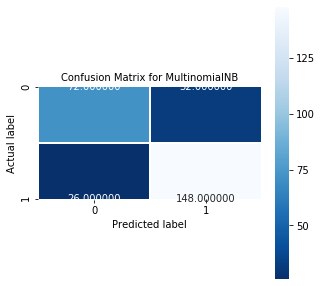

In [56]:
mnb_cm = metrics.confusion_matrix(real_test_data['Label'],mnb_pred)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(mnb_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix for MultinomialNB', size = 10);

report = classification_report(real_test_data['Label'],mnb_pred)
print(report)

In [58]:
## Passive Aggressive Classifier
## Instantiating a Passive Aggressive Classifier classifier: pa_tfidf_clf
pa_tfidf_clf = PassiveAggressiveClassifier()

## Fit the classifier to the training data
pa_tfidf_clf.fit(count_train, real_train_data['Label'])

## Create the predicted tags: pac_pred
pac_pred = pa_tfidf_clf.predict(count_test)
## Calculate the accuracy score: pac_score
pac_score = metrics.accuracy_score(real_test_data['Label'], pac_pred)

## Calculate the confusion matrix: pac_cm
pac_cm = metrics.confusion_matrix(real_test_data['Label'], pac_pred, labels=['REAL', 'FAKE'])
print('Confusion Matrix --- PassiveAggressiveClassifier')
print(pac_cm)
print("accuracy:   %0.3f" % pac_score)

Confusion Matrix --- PassiveAggressiveClassifier
[[136  38]
 [ 31  73]]
accuracy:   0.752


              precision    recall  f1-score   support

        FAKE       0.66      0.70      0.68       104
        REAL       0.81      0.78      0.80       174

    accuracy                           0.75       278
   macro avg       0.74      0.74      0.74       278
weighted avg       0.76      0.75      0.75       278



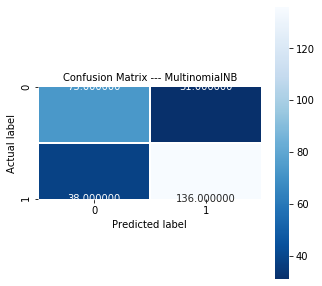

In [59]:
pac_cm = metrics.confusion_matrix(real_test_data['Label'],pac_pred)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(pac_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix --- MultinomialNB', size = 10);

report = classification_report(real_test_data['Label'],pac_pred)
print(report)

In [60]:
## Support Vector Classifier
## Instantiate a Support Vector classifier: svc_tfidf_clf
svc_tfidf_clf = LinearSVC()

## Fit the classifier to the training data
svc_tfidf_clf.fit(count_train, real_train_data['Label'])

## Create the predicted tags: svc_pred
svc_pred = svc_tfidf_clf.predict(count_test)

## Calculate the accuracy score: svc_score
svc_score = metrics.accuracy_score(real_test_data['Label'], svc_pred)

## Calculate the confusion matrix: cm
svc_cm = metrics.confusion_matrix(real_test_data['Label'], svc_pred, labels=['REAL', 'FAKE'])
print('Confusion Matrix --- LinearSVC')
print(svc_cm)
print("accuracy:   %0.3f" % svc_score)

Confusion Matrix --- LinearSVC
[[138  36]
 [ 29  75]]
accuracy:   0.766


              precision    recall  f1-score   support

        FAKE       0.68      0.72      0.70       104
        REAL       0.83      0.79      0.81       174

    accuracy                           0.77       278
   macro avg       0.75      0.76      0.75       278
weighted avg       0.77      0.77      0.77       278



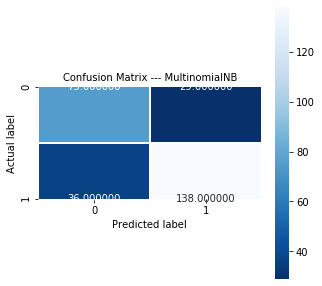

In [61]:
svc_cm = metrics.confusion_matrix(real_test_data['Label'],svc_pred)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(svc_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix --- MultinomialNB', size = 10);

report = classification_report(real_test_data['Label'],svc_pred)
print(report)

In [62]:
## Stochastic Gradient Descent Classifier
## Instantiate a Multinomial Naive Bayes classifier: sgd_tfidf_clf
sgd_tfidf_clf = SGDClassifier()

## Fit the classifier to the training data
sgd_tfidf_clf.fit(count_train, real_train_data['Label'])

## Create the predicted tags: sgd_pred
sgd_pred = sgd_tfidf_clf.predict(count_test)

## Calculate the accuracy score: score
sgd_score = metrics.accuracy_score(real_test_data['Label'], sgd_pred)

## Calculate the confusion matrix: cm
sgd_cm = metrics.confusion_matrix(real_test_data['Label'], sgd_pred, labels=['REAL', 'FAKE'])
print('Confusion Matrix --- SGD Classifier')
print(sgd_cm)

print("accuracy:   %0.3f" % sgd_score)

Confusion Matrix --- SGD Classifier
[[133  41]
 [ 27  77]]
accuracy:   0.755


              precision    recall  f1-score   support

        FAKE       0.65      0.74      0.69       104
        REAL       0.83      0.76      0.80       174

    accuracy                           0.76       278
   macro avg       0.74      0.75      0.75       278
weighted avg       0.76      0.76      0.76       278



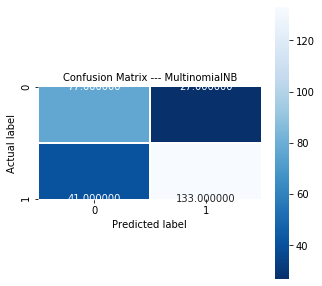

In [63]:
sgd_cm = metrics.confusion_matrix(real_test_data['Label'],sgd_pred)
plt.show()
plt.figure(figsize=(5,5))
sns.heatmap(sgd_cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix --- MultinomialNB', size = 10);

report = classification_report(real_test_data['Label'],sgd_pred)
print(report)